In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bookings = pd.read_csv('Atliq Hospitality Challenge/fact_bookings.csv')
Hotel_dates = pd.read_csv('Atliq Hospitality Challenge/dim_date.csv')
hotel_rooms = pd.read_csv('Atliq Hospitality Challenge/dim_rooms.csv')
Aggregated_bookings = pd.read_csv('Atliq Hospitality Challenge/fact_aggregated_bookings.csv')
Hotels = pd.read_csv('Atliq Hospitality Challenge/dim_hotels.csv')

In [3]:
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [5]:
bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


# There are no null values in the dataset.

In [6]:
print(bookings.shape)
print(bookings.ndim)
print(bookings.size)

(134590, 12)
2
1615080


In [7]:
bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<AxesSubplot:>

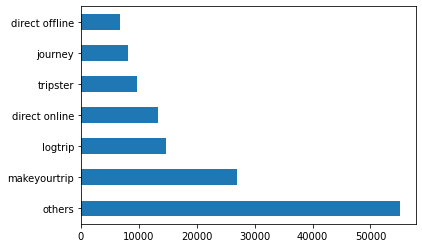

In [8]:
bookings.booking_platform.value_counts().plot(kind = 'barh')
# sns.barplot(x =booking_platform.index, y = booking_platform.values , color = 'skyblue')

In [9]:
bookings.booking_platform.value_counts().sort_values()

direct offline     6755
journey            8106
tripster           9630
direct online     13379
logtrip           14756
makeyourtrip      26898
others            55066
Name: booking_platform, dtype: int64

In [10]:
bookings.room_category.unique()   

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [11]:
category_of_room = bookings.room_category.value_counts()
category_of_room

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

<BarContainer object of 4 artists>

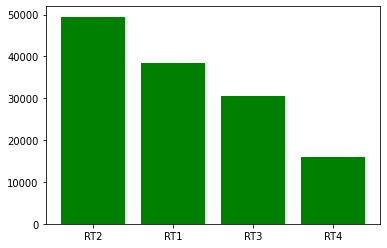

In [12]:
plt.bar(x = category_of_room.index, height = category_of_room.values , color = 'green')

In [13]:
#  Finding the outlier in revenue generated column

In [14]:
bookings.revenue_generated.min(), bookings.revenue_generated.max(), bookings.revenue_generated.mean(),bookings.revenue_generated.median() 

(6500, 45220, 14916.013188201203, 13500.0)

In [15]:
average, Standard_deviation = bookings.revenue_generated.mean(),bookings.revenue_generated.std() 

In [16]:
High_limit = average + (3 *  Standard_deviation)
low_limit = average - (3 *  Standard_deviation)

In [17]:
print(High_limit)
print(low_limit)

34274.61740350578
-4442.591027103368


In [18]:
bookings[bookings['revenue_generated'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [19]:
bookings[bookings['revenue_generated'] > High_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [20]:
bookings = bookings[bookings['revenue_generated'] <= High_limit]
bookings.shape

(133070, 12)

In [21]:
bookings['revenue_realized'].describe()

count    133070.000000
mean      12468.775464
std        6537.748605
min        2600.000000
25%        7600.000000
50%       11400.000000
75%       15300.000000
max       34200.000000
Name: revenue_realized, dtype: float64

In [22]:
Higher_limit_revenue_realized = bookings.revenue_realized.mean() + 3 * bookings.revenue_realized.std()

In [23]:
lower_limit_revenue_realized = bookings.revenue_realized.mean() - 3 * bookings.revenue_realized.std()

In [24]:
print(Higher_limit_revenue_realized)
print(lower_limit_revenue_realized)

32082.021279985467
-7144.470351902502


In [25]:
# Below mentioned rows are the outliers.

In [26]:
bookings[bookings.revenue_realized > Higher_limit_revenue_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,2022-04-26,2022-05-01,2022-05-02,2,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,2022-04-28,2022-05-01,2022-05-03,2,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,2022-04-30,2022-05-01,2022-05-06,2,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,2022-07-31,2022-07-31,2022-08-02,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


In [27]:
bookings[bookings.revenue_realized <= Higher_limit_revenue_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134578,Jul312217564RT310,17564,2022-07-31,2022-07-31,2022-08-02,1,RT3,others,2.0,Checked Out,20400,20400
134579,Jul312217564RT311,17564,2022-07-30,2022-07-31,2022-08-02,2,RT3,others,NaN,Checked Out,20400,20400
134583,Jul312217564RT44,17564,2022-07-31,2022-07-31,2022-08-01,1,RT4,others,NaN,Cancelled,32300,12920
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920


# Reading aggregating bookings

In [28]:
Aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [29]:
Aggregated_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19


In [42]:
Aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
Date                   0
Month                  0
year                   0
dtype: int64

In [ ]:
# no null values are observed.

In [30]:
grouped_data = Aggregated_bookings.groupby('property_id')[['successful_bookings','capacity']].sum()
print(grouped_data)

             successful_bookings  capacity
property_id                               
16558                       3153      4784
16559                       7338     11132
16560                       4693      8740
16561                       4418      6716
16562                       4820      9016
16563                       7147     10764
17558                       5036      9384
17559                       6142      9292
17560                       6013     11316
17561                       5183      7820
17562                       3424      7636
17563                       6337      9568
17564                       3982      8924
18558                       4475      8372
18559                       5256     11776
18560                       6638     10028
18561                       6458      9844
18562                       7333     11132
18563                       4728      8924
19558                       4371      9844
19559                       4705      8740
19560      

In [31]:
grouped_data.sort_values(by = 'successful_bookings', ascending = False)[:10]

,successful_bookings,capacity
property_id,,
16559,7338,11132
18562,7333,11132
16563,7147,10764
18560,6638,10028
18561,6458,9844
17563,6337,9568
17559,6142,9292
17560,6013,11316
19560,5979,9108


# These are the top 10 propery id which has successfull bookings along with its capacity.

In [32]:
# conversion of object to date time type

In [33]:
pd.to_datetime(Aggregated_bookings['check_in_date'])

0      2022-05-01
1      2022-05-01
2      2022-05-01
3      2022-05-01
4      2022-05-01
          ...    
9195   2022-07-31
9196   2022-07-31
9197   2022-07-31
9198   2022-07-31
9199   2022-07-31
Name: check_in_date, Length: 9200, dtype: datetime64[ns]

In [34]:
#  mslpit the columns  for month , day , year

In [35]:
Aggregated_bookings[['Date', 'Month', 'year']] = Aggregated_bookings['check_in_date'].str.split('-', expand = True)

In [36]:
Aggregated_bookings['year'] = '20' + Aggregated_bookings['year']

In [37]:
Aggregated_bookings['Month'].value_counts()

May    3100
Jul    3100
Jun    3000
Name: Month, dtype: int64

In [38]:
# collected data includes information of booking in the month of may, june, july.

In [39]:
Aggregated_bookings[Aggregated_bookings.capacity == Aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity,Date,Month,year
27,17558,01-May-22,RT2,38,50,01,May,2022
128,17558,02-May-22,RT2,27,50,02,May,2022
229,17558,03-May-22,RT2,26,50,03,May,2022
328,17558,04-May-22,RT2,27,50,04,May,2022
428,17558,05-May-22,RT2,29,50,05,May,2022
...,...,...,...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50,27,Jul,2022
8828,17558,28-Jul-22,RT2,21,50,28,Jul,2022
8928,17558,29-Jul-22,RT2,23,50,29,Jul,2022
9028,17558,30-Jul-22,RT2,32,50,30,Jul,2022


In [40]:
Aggregated_bookings[Aggregated_bookings['capacity'] == Aggregated_bookings['capacity'].min()]

,property_id,check_in_date,room_category,successful_bookings,capacity,Date,Month,year
75,19559,01-May-22,RT4,2,3,01,May,2022
99,16558,01-May-22,RT4,3,3,01,May,2022
175,19559,02-May-22,RT4,2,3,02,May,2022
176,16558,02-May-22,RT4,2,3,02,May,2022
276,16558,03-May-22,RT4,2,3,03,May,2022
...,...,...,...,...,...,...,...,...
8980,16558,29-Jul-22,RT4,2,3,29,Jul,2022
9076,19559,30-Jul-22,RT4,2,3,30,Jul,2022
9099,16558,30-Jul-22,RT4,3,3,30,Jul,2022
9176,19559,31-Jul-22,RT4,2,3,31,Jul,2022


In [41]:
# Based on capacity room category is changing, it shows less capacity  are likely to have category RT4, and more capacity are likely to have RT2 category rooms. 